# Independent Component Analysis (ICA) for Audio Signal Separation

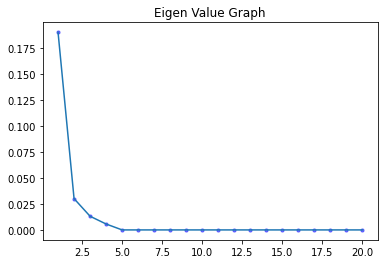

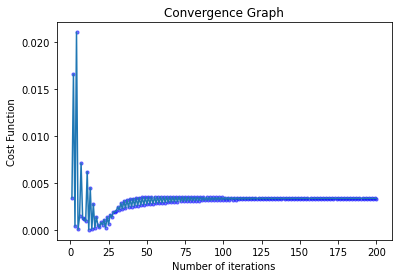


 Audio Signal 1 




 Audio Signal 2 




 Audio Signal 3 




 Audio Signal 4 



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as LA
import scipy.io.wavfile as wav
import librosa
from IPython.display import Audio

if __name__ == '__main__':
    X0, sr = librosa.load('/content/x_ica_1.wav', sr=None)
    X = np.zeros((20, len(X0)))
    X[0] = X0
    X[1], sr = librosa.load('/content/x_ica_2.wav', sr=None)
    X[2], sr = librosa.load('/content/x_ica_3.wav', sr=None)
    X[3], sr = librosa.load('/content/x_ica_4.wav', sr=None)
    X[4], sr = librosa.load('/content/x_ica_5.wav', sr=None)
    X[5], sr = librosa.load('/content/x_ica_6.wav', sr=None)
    X[6], sr = librosa.load('/content/x_ica_7.wav', sr=None)
    X[7], sr = librosa.load('/content/x_ica_8.wav', sr=None)
    X[8], sr = librosa.load('/content/x_ica_9.wav', sr=None)
    X[9], sr = librosa.load('/content/x_ica_10.wav', sr=None)
    X[10], sr = librosa.load('/content/x_ica_11.wav', sr=None)
    X[11], sr = librosa.load('/content/x_ica_12.wav', sr=None)
    X[12], sr = librosa.load('/content/x_ica_13.wav', sr=None)
    X[13], sr = librosa.load('/content/x_ica_14.wav', sr=None)
    X[14], sr = librosa.load('/content/x_ica_15.wav', sr=None)
    X[15], sr = librosa.load('/content/x_ica_16.wav', sr=None)
    X[16], sr = librosa.load('/content/x_ica_17.wav', sr=None)
    X[17], sr = librosa.load('/content/x_ica_18.wav', sr=None)
    X[18], sr = librosa.load('/content/x_ica_19.wav', sr=None)
    X[19], sr = librosa.load('/content/x_ica_20.wav', sr=None)

    # Data Centring
    Mean = np.mean(X, axis=1)
    X_standardized = (X - np.mean(X, axis=1, keepdims=True))
    cov_matrix = np.cov(X_standardized)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sorting Eigen Values and Eigen Vectors
    sort_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sort_indices]
    sorted_eigenvalues = eigenvalues[sort_indices]

    x = np.linspace(1, 20, len(eigenvalues))

    plt.plot(x, eigenvalues)
    plt.scatter(x, eigenvalues, s=10, c='blue', edgecolor='blue', alpha=0.5)
    plt.title("Eigen Value Graph")
    plt.show()

    # Number of independent Components 
    # Decided on the basis of 4 largest Eigen Values
    k = 4

    # Whitening PCA
    whitened_matrix = sorted_eigenvectors[:, :k] / np.sqrt(sorted_eigenvalues[:k])
    Z = np.matmul(whitened_matrix.T, X_standardized) # whitened data

    # ICA Implementation using the provided equations
    N = np.shape(X[0])
    NI = np.eye(k)*N
    l_rate = 1e-5
    tol = 0.00001
    W = np.random.rand(k, k)
    W = W / LA.norm(W)
    Y = np.matmul(W, Z)
    error_array = []

    for iteration in range(200):
        gy = np.tanh(Y)
        fy = np.power(Y, 3)
        matrix = np.matmul(gy, fy.T)
        delta_W = np.matmul(NI - matrix, W)
        W_new = W + l_rate*delta_W
        Y = np.matmul(W_new, Z)
        error = abs(W - W_new)
        error = np.min(error)
        error_array.append(error)
        if error < tol:
            break
        W = W_new
        W = W / LA.norm(W)

    x = np.linspace(1, len(error_array), len(error_array))
    plt.plot(x, error_array)
    plt.scatter(x, error_array, s=10, c='blue', edgecolor='blue', alpha=0.5)
    plt.title("Convergence Graph")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost Function")
    plt.show()

    print("\n Audio Signal 1 \n")
    display(Audio(data=Y[0], rate=sr))
    print("\n Audio Signal 2 \n")
    display(Audio(data=Y[1], rate=sr))
    print("\n Audio Signal 3 \n")
    display(Audio(data=Y[2], rate=sr))
    print("\n Audio Signal 4 \n")
    display(Audio(data=Y[3], rate=sr))

